# ✅ 머신러닝 모델링 워크플로우
## 1. 데이터 준비 (80%의 시간을 투자해야 하는 핵심 단계)

### 📌 목표: 모델이 학습할 수 있는 **정제된 특징(feature) 공간**을 구성

실제 성능은 이 단계에서 거의 결정된다.

#### 🔹 데이터 수집

* API, 웹 크롤링, DB, CSV, 센서 등 다양한 방식으로 수집
* 실무에서는 정형/비정형 데이터 혼합도 많음

#### 🔹 전처리

* **결측치 처리**: 제거(dropna), 평균/중앙값/모드 대체, KNN/모델 기반 대체
* **이상치 처리**: IQR, Z-score, 시각화(boxplot) 기반 제거 또는 수정
* **중복 제거**: `.drop_duplicates()`
* **데이터 타입 변환**: 날짜형, 범주형 처리

#### 🔹 정규화 / 표준화

* 정규화 (MinMaxScaler): \[0, 1] 스케일
* 표준화 (StandardScaler): 평균 0, 분산 1
* 트리 기반 모델은 필요 없음, 선형 모델/딥러닝 계열은 중요

#### 🔹 차원 축소 / 특성 선택

* PCA, t-SNE, UMAP (비지도 차원 축소)
* SelectKBest, Recursive Feature Elimination (지도 특성 선택)
* 중요 변수 추출: Random Forest feature importance, SHAP, LIME

#### 🔹 범주형 처리

* One-Hot Encoding (pandas `get_dummies()`, `OneHotEncoder`)
* Label Encoding (순서 있는 경우에만), Ordinal Encoding

---

## 2. 데이터셋 분할 (Train/Test Split)

### 📌 목표: 모델이 훈련 데이터에 과적합되지 않고 **미래를 일반화(generalization)** 할 수 있게 한다.

* 일반 비율: `train:test = 7:3`, `8:2` 추천
* `train_test_split()` 함수 사용
  예:

  ```python
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  ```
* **교차검증(K-Fold Cross Validation)** 도 도입 가능 (특히 데이터가 적을 때)

---

## 3. 알고리즘 선택 및 학습 (모델 훈련)

### 📌 목표: 문제 유형(분류/회귀/클러스터링 등)에 적합한 알고리즘을 선택하고 하이퍼파라미터 튜닝으로 최적화한다.

#### 🔹 분류(Classification) 문제일 경우 주요 알고리즘

| 알고리즘                                       | 설명               | 특징                |
| ------------------------------------------ | ---------------- | ----------------- |
| **KNN**                                    | 가장 가까운 k개의 이웃 기준 | 단순, 느림, 정규화 필요    |
| **로지스틱 회귀**                                | 확률 기반 이진 분류      | 선형, 해석 쉬움         |
| **의사결정트리**                                 | 규칙 기반 분기         | 시각화 용이, 과적합 주의    |
| **랜덤포레스트**                                 | 여러 트리의 앙상블       | 강력함, 변수 중요도 파악 가능 |
| **Gradient Boosting / XGBoost / LightGBM** | 부스팅 기반 강력 모델     | Kaggle 우승자 즐겨씀    |
| **SVM**                                    | 마진 최대화 초평면       | 고차원, 느림, 정규화 필수   |

#### 🔹 하이퍼파라미터 튜닝

* `GridSearchCV`, `RandomizedSearchCV`, `Optuna` 등 활용
* 하이퍼파라미터 예:

  * KNN: `n_neighbors`
  * RandomForest: `n_estimators`, `max_depth`
  * XGBoost: `learning_rate`, `max_depth`, `n_estimators`

---

## 4. 예측 (Prediction)

### 📌 목표: 학습된 모델로 **새로운 데이터의 정답을 추정**

```python
y_pred = model.predict(X_test)
```

* 확률 기반 예측이 필요한 경우: `model.predict_proba()`

---

## 5. 성능 평가 (Evaluation)

### 📌 목표: 모델의 **정확도, 일반화 능력, 오류 원인** 등을 정량적으로 평가

#### 🔹 기본 평가지표 (분류)

| 지표                   | 의미                         |
| -------------------- | -------------------------- |
| Accuracy             | 전체 정확도                     |
| Precision            | 양성으로 예측한 것 중 실제 양성 비율      |
| Recall (Sensitivity) | 실제 양성 중 예측에 성공한 비율         |
| F1-Score             | 정밀도와 재현율의 조화 평균            |
| ROC-AUC              | 분류 경계 민감도, 좋은 모델일수록 1에 가까움 |

```python
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
```

#### 🔹 상세 분석

* Confusion Matrix (`sklearn.metrics.confusion_matrix`)
* Classification Report (`classification_report`)
* ROC Curve, PR Curve 시각화

---

### 🔚 정리

```text
1. 데이터 준비 ▶️
2. 훈련/테스트 분할 ▶️
3. 모델 선택 및 학습 ▶️
4. 예측 ▶️
5. 성능 평가
```

In [18]:
# 1. 데이터 로드 및 탐색
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()  # Bunch 라는 클래스 타입

print("데이터 키:", list(data.keys()))
print("타겟이름:", data['target_names'])
print("특성이름:", data['feature_names'])
print("파일명:", data['filename'])

데이터 키: ['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']
타겟이름: ['malignant' 'benign']
특성이름: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
파일명: breast_cancer.csv


In [16]:
print("\n데이터설명:")
print(data.DESCR)


데이터설명:
.. _breast_cancer_dataset:

Breast cancer Wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

In [2]:
# 2. 데이터를 나누기 
X = data.data   # ndarray 2차원배열
y = data.target # ndarray 1차원배열 

print("X 데이터 처음 10개:")
print(X[:10])
print("\ny 데이터:")
print(y)


X 데이터 처음 10개:
[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2

In [3]:
# 3. 훈련셋과 테스트셋으로 나누기
from sklearn.model_selection import train_test_split 

# 데이터를 랜덤하게 섞어서 70%추출 , train_test_split :데이터를 랜덤하게 섞어서 나눠준다
# tuple로 반환 , random_state인자가 시드역할, 계속 같은 데이터 내보내고 싶으면 이 값을 고정해야 한다
# test_size=0.3  그 비율대로 나뉜다 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1234, test_size=0.4)
print("훈련셋 크기:", X_train.shape)
print("테스트셋 크기:", X_test.shape)


훈련셋 크기: (341, 30)
테스트셋 크기: (228, 30)


## 데이터 시각화

산점행렬(scatter matrix)를 통해 데이터 전체를 확인할 수 있습니다.
- 특성이 4개면 각 특성대 특성으로만 그릴 수 있어서 차트 4X4=16개
- 특성이 10개가 되면 10 X 10 = 100개 차트가 만들어집니다
- scatter_matrix 차트는 직접 노가다로 그릴수도 있고 DataFrame이 제공해줍니다
- 아니면 Seaborn 차트를 사용할 수도 있습니다
- numpy 배열을 DataFrame으로 바꿔서 사용합니다


# 📊 산점도 행렬(Scatter Matrix) 시각화 &

# 🤖 KNN (K-Nearest Neighbors) 알고리즘 개요

---

## 1. 📈 산점도 행렬 (Scatter Matrix)

### ✅ 목적

* 데이터셋의 **모든 특성 간 관계를 한눈에 파악**하는 시각화 방법
* **각 특성 쌍의 산점도 + 대각선에는 히스토그램** 표시

### ✅ 특징

* 특성이 `n`개일 경우 `n x n`개의 차트가 생성됨

  * 예: 특성 4개 → 16개의 서브플롯
  * 예: 특성 10개 → 100개 차트 (시각적 부담 ↑)

### ✅ 구현 예시 (pandas + matplotlib)

```python
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from pandas.plotting import scatter_matrix

# 데이터 준비
data = load_iris()
X = data.data
y = data.target

# NumPy 배열 → DataFrame 변환
iris_df = pd.DataFrame(X, columns=data['feature_names'])

# 산점도 행렬 그리기
scatter_matrix(
    iris_df,
    c=y,  # 클래스별 색상
    figsize=(15, 15),  # 크기 (inch 기준)
    marker='o',
    hist_kwds={'bins': 20},  # 히스토그램 구간 수
    s=60,  # 점 크기
    alpha=0.8  # 투명도
)

plt.show()
```

> ✅ `c=y`를 통해 각 클래스(예: Iris Setosa, Versicolor, Virginica)를 다른 색상으로 구분 가능
> ✅ 특성 간 선형/비선형 관계, 군집 구조 확인에 유용

---

## 2. 🤖 KNN (K-Nearest Neighbors) 알고리즘

### ✅ 핵심 개념

* **"내 이웃이 누구인가?"**
* 새로운 데이터가 주어졌을 때, **가장 가까운 K개의 이웃의 레이블을 기반으로 예측**
* 거리 기반 알고리즘 → 유클리드 거리 기본 사용

### ✅ 작동 방식

1. 테스트 데이터와 훈련 데이터 간 거리를 계산
2. 가장 가까운 `K개` 이웃 선택
3. 분류일 경우:

   * 다수결 투표로 클래스 결정 (ex. K=3, \[1,1,0] → class 1)
4. 회귀일 경우:

   * 이웃의 값의 평균으로 예측값 계산

### ✅ 거리 계산 방식

* **Euclidean Distance** (일반적)
* Manhattan, Minkowski 등도 선택 가능

```python
# 유클리드 거리 예시
import numpy as np
distance = np.sqrt(np.sum((point1 - point2)**2))
```

### ✅ 주요 하이퍼파라미터

| 파라미터          | 설명                                          |
| ------------- | ------------------------------------------- |
| `n_neighbors` | 이웃의 수 (일반적으로 홀수 사용)                         |
| `weights`     | 'uniform' (동일 가중치), 'distance' (가까울수록 영향 ↑) |
| `metric`      | 거리 측정 방식 (기본: 'minkowski' → p=2는 유클리드)      |

```python
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')
model.fit(X_train, y_train)
```

### ✅ 특징 요약

| 항목    | 내용                                                    |
| ----- | ----------------------------------------------------- |
| 학습 방식 | 저장 기반 (모델이 별도 학습 없이 저장된 데이터 활용)                       |
| 분류/회귀 | 모두 가능 (`KNeighborsClassifier`, `KNeighborsRegressor`) |
| 장점    | 이해 쉬움, 파라미터 적음                                        |
| 단점    | 느린 예측 속도 (특히 데이터 양 많을 때), 차원의 저주 영향                   |



## KNN 이웃 알고리즘

**KNN 이웃알고리즘**은 내 옆집에 누가 사느냐를 확인하는 것과 같습니다.
- 거리로 가장 가까운 거리에 누가 있느냐를 확인
- 거리를 재는 방식이 유클리드 기하학을 사용
- 이웃을 몇개까지 볼거냐를 선택할 수 있음
- 이웃의 개수를 지정할 수 있음 (대부분의 홀수개를 지정하는 경우가 많음)
- 회귀 분류 둘다 가능


In [5]:
# 4. KNN 알고리즘 하이퍼파라미터 튜닝
from sklearn.neighbors import KNeighborsClassifier

# 적당한 하이퍼파라미터를 골라보자 
n_neighbors = 10  # 적당히 
trainscoreList = list()
testscoreList = list()

for i in range(1, n_neighbors+1):  
    model = KNeighborsClassifier(n_neighbors=i)  # 이웃의 개수 
    model.fit(X_train, y_train) 
    score1 = model.score(X_train, y_train)
    score2 = model.score(X_test, y_test)
    trainscoreList.append(score1)
    testscoreList.append(score2)

print("KNN 하이퍼파라미터 튜닝 완료")


KNN 하이퍼파라미터 튜닝 완료


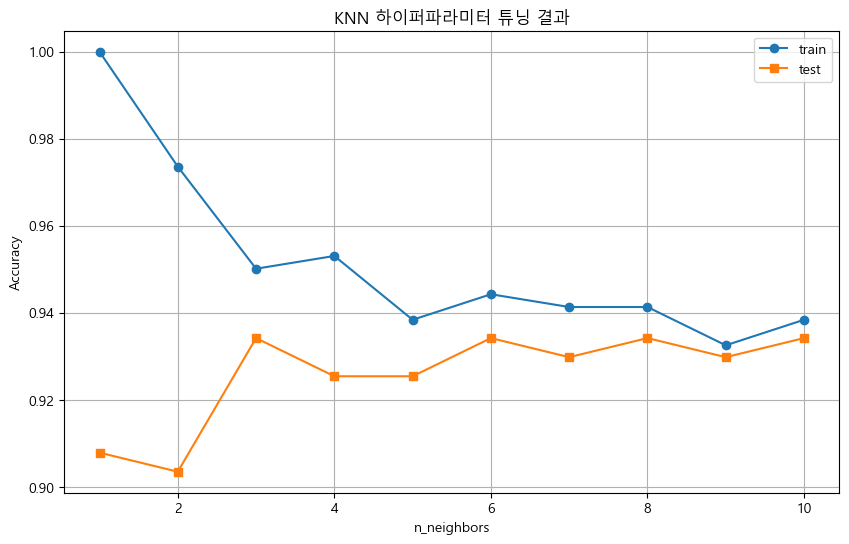

In [10]:
# 5. KNN 성능 시각화
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'  # 윈도우: 맑은 고딕
plt.rcParams['axes.unicode_minus'] = False     # 마이너스(-) 깨짐 방지

# x축, y축
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(trainscoreList)+1), trainscoreList, label='train', marker='o')
plt.plot(range(1, len(testscoreList)+1), testscoreList, label='test', marker='s')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.title('KNN 하이퍼파라미터 튜닝 결과')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
# 예측 결과 출력 (주석 처리됨)
# 클래스이름으로 출력
# class_names = list(data.target_names)
# for i, j in zip(y_pred, y_test):
#     print("예측 :{:20s} 실제:{:20s}".format(class_names[i], class_names[j]))


In [13]:
# 6. 데이터 정규화 및 반복횟수 증가 후 로지스틱 회귀 분석
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model2 = LogisticRegression(max_iter=1000)
model2.fit(X_train_scaled, y_train)

print("[정규화+반복횟수 증가] 로지스틱 회귀 결과:")
print("훈련셋 평가:", model2.score(X_train_scaled, y_train))
print("테스트셋 평가:", model2.score(X_test_scaled, y_test))
print("계수(coefficients):", model2.coef_)
print("절편(intercept):", model2.intercept_)

[정규화+반복횟수 증가] 로지스틱 회귀 결과:
훈련셋 평가: 0.9941348973607038
테스트셋 평가: 0.9605263157894737
계수(coefficients): [[-0.74258278 -0.49459351 -0.7004177  -0.68633001 -0.15090722  0.27082493
  -0.71248544 -0.78520409 -0.049579    0.3732094  -0.92168444 -0.18771975
  -0.56359801 -0.88448608 -0.01478905  0.57353712 -0.01649088 -0.10175532
   0.56554265  0.33264792 -0.79163853 -0.98168094 -0.60774951 -0.79362143
  -1.06131925  0.09212294 -0.85168384 -0.61111703 -0.72395227 -0.68953935]]
절편(intercept): [0.46669514]
